por: Matheus Araujo
## Resumo da aula:

* (80%) Introdução a Classificadores Lineares: Passo a Passo
* (20%) Utilizando Classificador linear para iris setosa

In [706]:

from numpy.random import normal
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np


In [750]:
#Criando bolas azuis
bolas_azuis = {}
azul_peso_media = 45
azul_raio_media = 150
bolas_azuis["peso"] = normal(azul_peso_media, 10, 100)
bolas_azuis["raio"] = normal(azul_raio_media, 15, 100)
bolas_azuis["classe"] = "azul"
bolas_azuis_df = pd.DataFrame(bolas_azuis) 

#Criando bolas vermelhas
bolas_vermelhas = {}
vermelho_peso_media = 35
vermelho_raio_media = 100
bolas_vermelhas["peso"] = normal(vermelho_peso_media, 5, 100)
bolas_vermelhas["raio"] = normal(vermelho_raio_media, 15, 100)
bolas_vermelhas["classe"] = "vermelho"
bolas_vermelhas_df = pd.DataFrame(bolas_vermelhas) 
print(bolas_vermelhas_df.head())
print(bolas_azuis_df.head())

        peso        raio    classe
0  31.403953  128.755758  vermelho
1  35.567257   81.225403  vermelho
2  45.968887  107.091063  vermelho
3  33.676464  108.486616  vermelho
4  34.792737  100.875356  vermelho
        peso        raio classe
0  33.494646  141.610530   azul
1  44.970438  132.271452   azul
2  40.640546  169.967026   azul
3  39.976186  147.606748   azul
4  53.849024  166.678328   azul


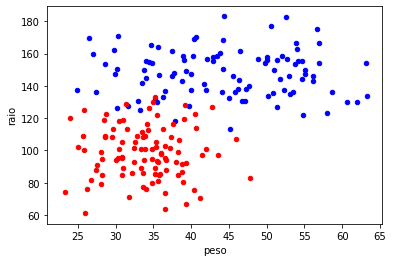

In [751]:
ax = bolas_azuis_df.plot.scatter("peso", "raio", c="b")
ax = bolas_vermelhas_df.plot.scatter("peso", "raio",ax=ax, c="r")

In [752]:
# Colocando as bolas dentro do mesmo caixa
caixa_original_df = pd.concat([bolas_azuis_df, bolas_vermelhas_df])

# Certifica que cada bola tem um index unico
mapa_cor_classe = {
    "vermelho" : 1,
    "azul" : 0
}
caixa_original_df = caixa_original_df.reset_index(drop=True)
caixa_original_df["classe"] = caixa_original_df["classe"].apply(lambda classe: mapa_cor_classe[classe])
print("Numero de bolas: {}, Numero de Colunas: {}".format(bolas_df.shape[0], bolas_df.shape[1]))

Numero de bolas: 200, Numero de Colunas: 3


In [753]:
#Chacoalhando o caixa
caixa_original_df = caixa_original_df.sample(frac=1)
caixa_original_df.head()

,peso,raio,classe
172,30.815380,105.294137,1
81,41.635390,140.996039,0
154,40.618794,114.075233,1
70,46.424240,161.260755,0
131,35.280410,102.396552,1


In [754]:
#Pegando uma amostra de 10% da caixa e plotando
amostra_df = caixa_original_df.sample(n=80) # Pegando amostra 
caixa_df = caixa_original_df.drop(amostra_df.index) # Removendo bolas da caixa

print("Bolas na caixa: {}, Bolas na amostra: {}".format(caixa_df.shape[0], amostra_df.shape[0]))

Bolas na caixa: 120, Bolas na amostra: 80


# Voce conseguiria adivinhar qual é classe de cada bola?

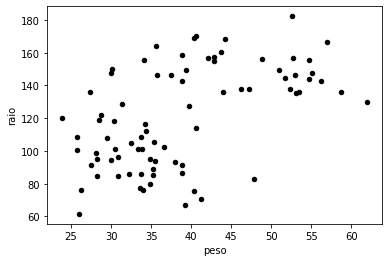

In [755]:
amostra_df.plot.scatter("peso","raio", c="k")

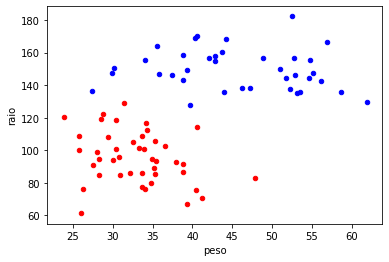

In [756]:
# Plotando com cor
ax = amostra_df[amostra_df["classe"] == 0].plot.scatter("peso", "raio", c="b")
amostra_df[amostra_df["classe"] == 1].plot.scatter("peso", "raio", ax=ax, c="r")


In [757]:
#É comum usar 42 como random_state (para mais informações consulte
#o guia do mochileiro das galáxias.)

#Definindo classificador
clf = LogisticRegression()

# Definindo vetores de features
X = amostra_df[["peso", "raio"]].values

# Definindo vetor da variavel alvo
Y = amostra_df["classe"].values

# Aplicando o classificador
clf.fit(X,Y)
clf.score(X,Y)

/home/matheus/personal_python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9375

In [773]:
#Função auxiliar para plotar o hiperplano do classificador linear
def plot_hiperplano(clf, ax=None):
    global amostra_df
    w = clf.coef_[0]
    # Criando hiperplano (linha)
    m = -w[0] / w[1]
    xx = np.linspace(amostra_df["peso"].min(), amostra_df["peso"].max())
    
    # Formula da reta: a*x + by + c = 0
    # Logo: y = -ax/b -c/b    
    yy = m * xx - (clf.intercept_[0]) / w[1]
    # Plotando hiperplano
    if ax:
        ax.plot(xx, yy)
    else:        
        plt.plot(xx, yy)
        plt.xlim(amostra_df["peso"].min(), amostra_df["peso"].max())
        plt.ylim(amostra_df["raio"].min(), amostra_df["raio"].max())
        
        


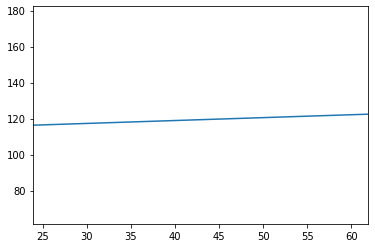

In [774]:
# Plotando o Classificador linear
plot_hiperplano(clf)

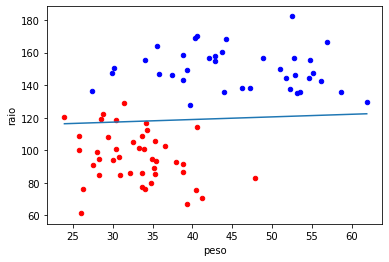

In [775]:
# Plotando o classificador linear junto com nossa amostra
ax = amostra_df[amostra_df["classe"] == 0].plot.scatter("peso", "raio", c="b")
amostra_df[amostra_df["classe"] == 1].plot.scatter("peso", "raio", ax=ax, c="r")
plot_hiperplano(clf,ax)

## Qual é a performance do nosso classificador?

In [776]:
print("Acuracia Media", clf.score(X,Y))

Acuracia Media 0.9375


# Vamos retirar mais bolas

In [777]:
# Pegando primeira bola da caixa e utilizando o classificador
bola_x = caixa_df.iloc[0] # Escolhendo bola
caixa_df = caixa_df.drop(bola_x.name, errors="ignore") # Removendo bola
print("Bolas na Caixa: {}".format(caixa_df.shape[0]))
print("Bola Removida:")
bola_x

Bolas na Caixa: 118
Bola Removida:


peso         41.635390
raio        140.996039
classe        0.000000
previsao      0.000000
Name: 81, dtype: float64

In [778]:
classe_prevista = clf.predict(bola_x[["peso", "raio"]].values.reshape(1,-1))[0]
print("Classe Prevista: {}".format(classe_prevista))

Classe Prevista: 0


In [779]:
mapa_class_cor = {
    1 : "vermelho",
    0 : "azul"
}
print("Classe Prevista: {}".format(mapa_class_cor[classe_prevista]))

Classe Prevista: azul


# Classificando o resto da caixa

In [780]:
print("Bolas na caixa: {}".format(caixa_df.shape[0]))

Bolas na caixa: 118


In [781]:
bolas_previsoes = clf.predict(caixa_df[["peso", "raio"]].values)
bolas_previsoes_cores = list(map(lambda classe: mapa_class_cor[classe], bolas_previsoes))
print("Primeiras 10 bolas na caixa são: {}".format(bolas_previsoes_cores[:10]))

Primeiras 10 bolas na caixa são: ['azul', 'vermelho', 'azul', 'vermelho', 'azul', 'vermelho', 'vermelho', 'vermelho', 'azul', 'azul']


In [782]:
caixa_df["previsao"] = bolas_previsoes
caixa_df.head()

,peso,raio,classe,previsao
70,46.424240,161.260755,0,0
131,35.280410,102.396552,1,1
31,36.517086,137.096134,0,0
197,36.556863,73.841040,1,1
176,39.042908,119.482434,1,0


## Qual é a performace do nosso classificador para o resto da caixa?

**!Importante:** Lembre-se que o classficador foi treinado com as amostras. As bolas dentro da caixa nunca foram vistas antes.

In [783]:

acuracia_media = clf.score(caixa_df[["peso", "raio"]].values , caixa_df[["classe"]].values)
print("Acuracia média na caixa: {:.2f}%".format(acuracia_media*100))

Acuracia média na caixa: 89.83%


## Desmitificando calculo da acuracia média

In [784]:
total = caixa_df.shape[0]
acertou = 0
for index, bola in caixa_df.iterrows():
    if bola["classe"] == bola["previsao"]:
        acertou += 1
print("Acertou: {}\nErrou: {}\nAcuracia na Caixa: {:.2f}%".format(acertou, total - acertou, (acertou/total) * 100))

Acertou: 106
Errou: 12
Acuracia na Caixa: 89.83%
